In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
import pandas as pd
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
x = df.drop(['target'],axis=1)
y = df.target
df.shape

(1797, 65)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(len(X_train))
print(len(X_test))

1437
360


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(X_test,y_test)

0.9777777777777777

In [ ]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(knn.score(X_test,y_test))

0.9805555555555555
0.9777777777777777
0.975
0.975
0.975
0.975
0.9805555555555555
0.9777777777777777
0.9777777777777777


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cnn=confusion_matrix(y_test,y_pred)
cnn

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 28]])

<Axes: >

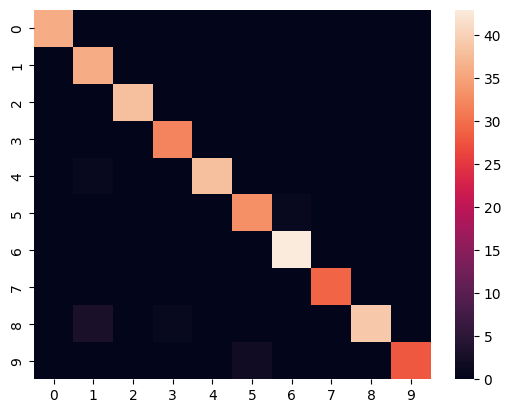

In [ ]:
import seaborn as sns
sns.heatmap(cnn)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        36
           2       1.00      1.00      1.00        38
           3       0.97      1.00      0.98        32
           4       1.00      0.97      0.99        39
           5       0.94      0.97      0.96        34
           6       0.98      1.00      0.99        43
           7       1.00      1.00      1.00        29
           8       1.00      0.91      0.95        43
           9       1.00      0.93      0.97        30

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn,{'n_neighbors':range(1,20)})
clf.fit(X_train,y_train)
clf.cv_results_

{'mean_fit_time': array([0.00715618, 0.00748343, 0.0073    , 0.00631614, 0.00601859,
        0.00569496, 0.00602064, 0.00616856, 0.00525112, 0.00529861,
        0.00533633, 0.00525928, 0.00588531, 0.00557284, 0.00610752,
        0.0055521 , 0.00794601, 0.00767455, 0.01695418]),
 'std_fit_time': array([1.61613082e-03, 1.44753222e-03, 2.12078375e-03, 8.91782969e-04,
        8.32769994e-04, 3.78601065e-04, 1.37029336e-03, 1.19639074e-03,
        2.52614421e-04, 2.54334409e-04, 1.83269395e-04, 8.68209039e-05,
        1.07531169e-03, 3.28184448e-04, 9.30923292e-04, 4.91148671e-04,
        5.11544209e-03, 4.63865440e-03, 8.86804978e-03]),
 'mean_score_time': array([0.03759108, 0.0369462 , 0.04464102, 0.04104133, 0.03782301,
        0.0378448 , 0.0449048 , 0.03659272, 0.03445525, 0.03698106,
        0.03775058, 0.03886032, 0.04239597, 0.03907018, 0.03913918,
        0.04031329, 0.04019446, 0.06012721, 0.07563605]),
 'std_score_time': array([0.00319953, 0.00152106, 0.00800917, 0.00615558, 0.00

In [ ]:
df1 = pd.DataFrame(clf.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007156,0.001616,0.037591,0.003200,1,{'n_neighbors': 1},0.986111,0.986111,0.986063,0.979094,0.993031,0.986082,0.004407,1
1,0.007483,0.001448,0.036946,0.001521,2,{'n_neighbors': 2},0.975694,0.986111,0.982578,0.979094,0.989547,0.982605,0.004911,3
2,0.007300,0.002121,0.044641,0.008009,3,{'n_neighbors': 3},0.982639,0.989583,0.982578,0.982578,0.986063,0.984688,0.002791,2
3,0.006316,0.000892,0.041041,0.006156,4,{'n_neighbors': 4},0.975694,0.989583,0.979094,0.975610,0.982578,0.980512,0.005212,5
4,0.006019,0.000833,0.037823,0.003489,5,{'n_neighbors': 5},0.979167,0.993056,0.979094,0.979094,0.979094,0.981901,0.005577,4
5,0.005695,0.000379,0.037845,0.002672,6,{'n_neighbors': 6},0.979167,0.982639,0.979094,0.972125,0.975610,0.977727,0.003576,9
6,0.006021,0.001370,0.044905,0.015545,7,{'n_neighbors': 7},0.986111,0.989583,0.975610,0.975610,0.975610,0.980505,0.006095,6
7,0.006169,0.001196,0.036593,0.002024,8,{'n_neighbors': 8},0.982639,0.986111,0.975610,0.975610,0.972125,0.978419,0.005145,7
8,0.005251,0.000253,0.034455,0.001155,9,{'n_neighbors': 9},0.975694,0.986111,0.972125,0.972125,0.972125,0.975636,0.005417,11
9,0.005299,0.000254,0.036981,0.000835,10,{'n_neighbors': 10},0.979167,0.989583,0.972125,0.975610,0.975610,0.978419,0.006010,7


In [ ]:
df1[['mean_score_time','param_n_neighbors','params']]

,mean_score_time,param_n_neighbors,params
0,0.037591,1,{'n_neighbors': 1}
1,0.036946,2,{'n_neighbors': 2}
2,0.044641,3,{'n_neighbors': 3}
3,0.041041,4,{'n_neighbors': 4}
4,0.037823,5,{'n_neighbors': 5}
5,0.037845,6,{'n_neighbors': 6}
6,0.044905,7,{'n_neighbors': 7}
7,0.036593,8,{'n_neighbors': 8}
8,0.034455,9,{'n_neighbors': 9}
9,0.036981,10,{'n_neighbors': 10}


In [ ]:
clf.best_score_

0.9860820751064653

In [ ]:
clf.best_params_



{'n_neighbors': 1}

In [ ]:
df2 = pd.read_csv('/content/salaries.csv')
df2.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['company'] =le.fit_transform(df2['company'])
df2['job']=le.fit_transform(df2['job'])
df2['degree']=le.fit_transform(df2['degree'])
df2.head()

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

model = DecisionTreeClassifier()

# Reset x and y to ensure they have the same number of rows
x = df2.drop('salary_more_then_100k', axis=1)  # Drop the target column from features
y = df2['salary_more_then_100k']  # Target variable

model.fit(x,y)  # Now fit the model

DecisionTreeClassifier()

In [ ]:
model.score(x,y)


1.0

In [ ]:

model.tree_

[Text(0.36363636363636365, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.18181818181818182, 0.75, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2727272727272727, 0.5833333333333334, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.75, 'x[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7272727272727273, 0.4166666666666667, 'x

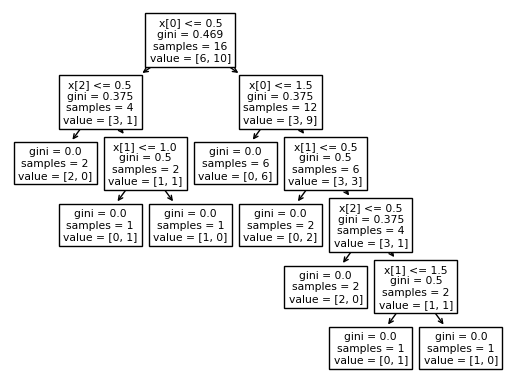

In [ ]:
plot_tree(model)


In [ ]:
tree = model.tree_
tree

In [ ]:
print(tree.feature)
print(tree.children_left)
print(tree.children_right)
print(tree.threshold)

[ 0  2 -2  1 -2 -2  0 -2  1 -2  2 -2  1 -2 -2]
[ 1  2 -1  4 -1 -1  7 -1  9 -1 11 -1 13 -1 -1]
[ 6  3 -1  5 -1 -1  8 -1 10 -1 12 -1 14 -1 -1]
[ 0.5  0.5 -2.   1.  -2.  -2.   1.5 -2.   0.5 -2.   0.5 -2.   1.5 -2.
 -2. ]


In [ ]:
print(tree.impurity)

[0.46875 0.375   0.      0.5     0.      0.      0.375   0.      0.5
 0.      0.375   0.      0.5     0.      0.     ]


In [ ]:
tree.value


array([[[ 6., 10.]],

       [[ 3.,  1.]],

       [[ 2.,  0.]],

       [[ 1.,  1.]],

       [[ 0.,  1.]],

       [[ 1.,  0.]],

       [[ 3.,  9.]],

       [[ 0.,  6.]],

       [[ 3.,  3.]],

       [[ 0.,  2.]],

       [[ 3.,  1.]],

       [[ 2.,  0.]],

       [[ 1.,  1.]],

       [[ 0.,  1.]],

       [[ 1.,  0.]]])

In [ ]:
df3 = pd.read_csv('/content/titanic.csv')
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df4 = df3.drop(['PassengerId','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
df4.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


In [ ]:
df4['Sex'] = le.fit_transform(df4['Sex'])
df4.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500


In [ ]:
a= df4.drop(['Survived','Name'],axis=1)
b =df4['Survived']

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(a,b)

DecisionTreeClassifier()

In [ ]:
model1.score(a,b)


0.8383838383838383

[Text(0.41648706896551724, 0.9642857142857143, 'x[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.1939655172413793, 0.8928571428571429, 'x[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.06896551724137931, 0.8214285714285714, 'x[3] <= 79.025\ngini = 0.233\nsamples = 170\nvalue = [9, 161]'),
 Text(0.034482758620689655, 0.75, 'x[3] <= 28.856\ngini = 0.117\nsamples = 117\nvalue = [7, 110]'),
 Text(0.017241379310344827, 0.6785714285714286, 'gini = 0.169\nsamples = 70\nvalue = [7, 63]'),
 Text(0.05172413793103448, 0.6785714285714286, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(0.10344827586206896, 0.75, 'x[2] <= 8.0\ngini = 0.046\nsamples = 53\nvalue = [2, 51]'),
 Text(0.08620689655172414, 0.6785714285714286, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1206896551724138, 0.6785714285714286, 'x[2] <= 27.0\ngini = 0.038\nsamples = 52\nvalue = [1, 51]'),
 Text(0.10344827586206896, 0.6071428571428571, 'x[2] <= 18.5\ngini = 0.124\nsamples

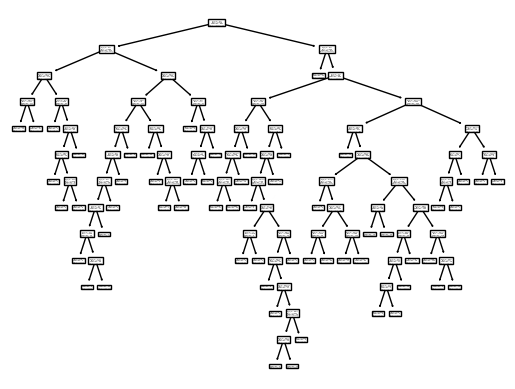

In [ ]:
plot_tree(model1)